# Importing Libraries

In [1]:
import os
import numpy as np
from scipy.stats import multivariate_normal

from func import MeanShift, RegularizedEMClustering
import matplotlib.pyplot as plt

# 存储路径
if not os.path.exists('./hw3'):
    os.makedirs('./hw3')

# Generate data

In [2]:
# 定义高斯混合分布的参数
means = np.array([[0, 0], [5, 5]])
covs = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]]])
weights = np.array([0.5, 0.5])

# 从高斯混合分布中采样
np.random.seed(0)
num_samples = 1000
cluster_id = np.random.choice(np.arange(len(means)), size=num_samples, p=weights)
samples = np.array([np.random.multivariate_normal(means[i], covs[i]) for i in cluster_id])

# Plot data

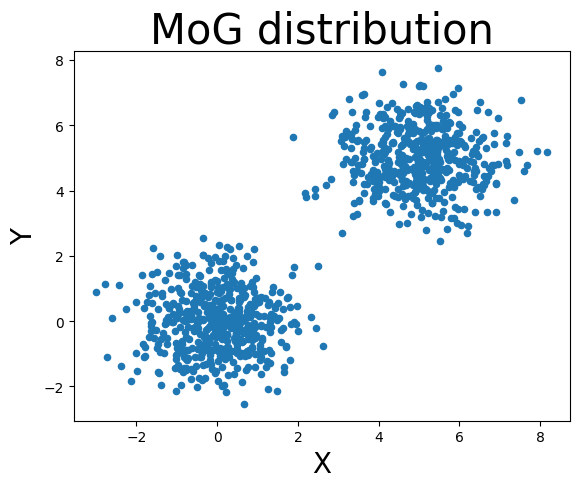

In [3]:
plt.scatter(samples[:, 0], samples[:, 1], s=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title('MoG distribution', fontsize=30)
plt.savefig('./hw3/MoG.png', dpi=300)
plt.show()

# Fit MeanShift

In [3]:
# 使用Mean-Shift算法进行聚类
ms = MeanShift(bandwidth=1.0, max_iterations=100)
ms.fit(samples)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
num_clusters = ms.n_clusters_

# Plot clustering results

In [ ]:
# 绘制聚类结果
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(num_clusters):
    cluster_samples = samples[labels == i]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], c=colors[i], label=f'Cluster {i+1}', s=20)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', color='black', s=200, label='Cluster Centers')
plt.title('Mean-Shift Clustering', fontsize=30)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.legend(fontsize=15)
plt.savefig('./hw3/MeanShift.png', dpi=300)

plt.show()


# Fit EM algorithm

In [5]:
# 使用EM算法进行聚类
gmm = RegularizedEMClustering(n_clusters=2, regularization=1e-6, max_iterations=100)
gmm.fit(samples)
gmm_labels = gmm.labels_
gmm_cluster_centers = gmm.cluster_centers_
gmm_num_clusters = len(gmm_cluster_centers)

# Plot clustering results

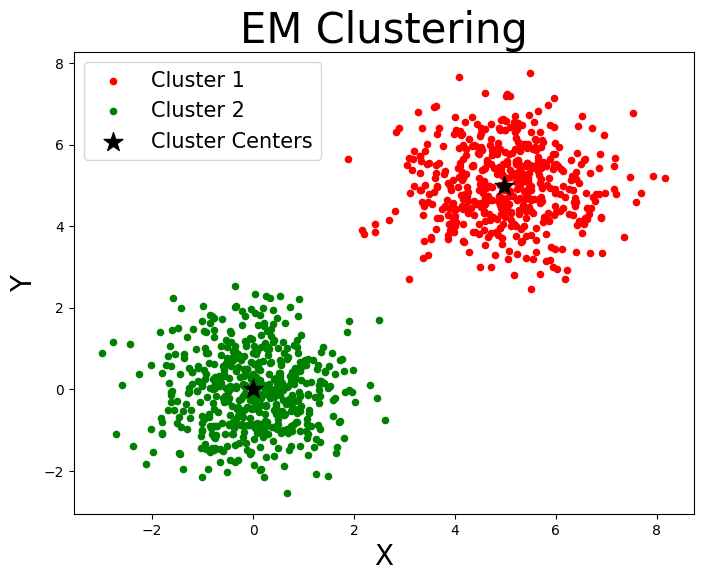

In [7]:
# 绘制聚类结果
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(gmm_num_clusters):
    cluster_samples = samples[gmm_labels == i]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], c=colors[i], label=f'Cluster {i+1}', s=20)

plt.scatter(gmm_cluster_centers[:, 0], gmm_cluster_centers[:, 1], marker='*', color='black', s=200, label='Cluster Centers')
plt.title('EM Clustering', fontsize=30)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.legend(fontsize=15)
plt.savefig('./hw3/EM.png', dpi=300)

plt.show()